# Solve $\Phi$<sub>'tt</sub> = $\Phi$<sub>'xx</sub> + $\beta$$\Phi$

#### Solve on a periodic grid then solve on x is an element of [0,L] and impose no incoming boundary values at both sides ($\Phi(0)=\Phi(L)=0$). Then show convergence of the obtained solution.

In [227]:
using Plots

In [228]:
xstart = 0
xend = 10

N = 100

delta_x = (xend-xstart)/N

lambda = 0.1

delta_t = lambda*delta_x

beta = 1.0;

In [229]:
# Initial conditions
# phi,tt = phi,xx
# g = phi,t
# f = phi,x

# phi,t = g
# f,t = g,x
# g,t = f,x <- find this by plugging into the original equation 
function init(x::Float64)
    phi_initial = exp(-((x-5)^2)) - exp(-(5)^2)
    f_initial = exp(-((x-5)^2)) - exp(-(5)^2)
    g_initial = -2*(x-5)*exp(-((x-5)^2))
    return [phi_initial,g_initial,f_initial]
end

init (generic function with 1 method)

In [230]:
phi0 = zeros(N+1,1)
f0 = zeros(N+1,1)
g0 = zeros(N+1,1)

for i in 1:N+1
    phi0[i],g0[i],f0[i] = init(delta_x*(i-1))
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

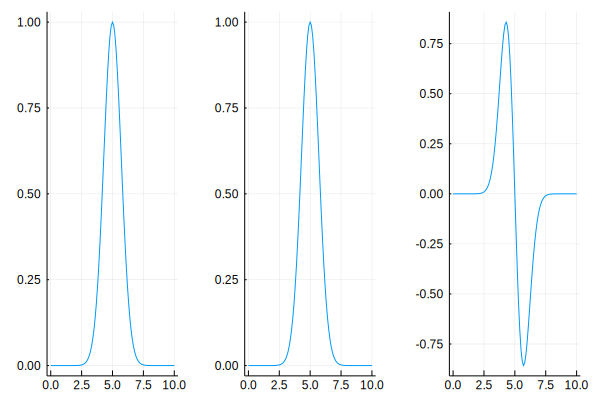

In [231]:
p1 = plot(x,phi0)
p2 = plot(x,f0)
p3 = plot(x,g0)
plot(p1,p2,p3,layout=(1,3),legend=false)

In [232]:
# Solid boundary contitions

function update(U0,f0,g0,dt::Float64,dx::Float64,B::Float64)
    
    n = length(U0)
    
    UN = zeros(n,1)
    fN = zeros(n,1)
    gN = zeros(n,1)
    
    UN[1] = 0
    fN[1] = 0
    gN[1] = g0[1]+ dt*(f0[2]-f0[1])/dx
    
    for i in 2:n-1
        
        # Forward Time Centered Space

        fN[i] = f0[i] + dt*(g0[i+1]-g0[i-1])/(2*dx) - dt*B^2*U0[i]
        gN[i] = g0[i] + dt*(f0[i+1]-f0[i-1])/(2*dx)
        UN[i] = U0[i] + dt*f0[i]

    end
    
    UN[n] = 0
    fN[n] = 0
    gN[n] = g0[n]+ dt*(f0[n]-f0[n-1])/dx
    
    return UN,fN,gN
    
end

update (generic function with 1 method)

In [233]:
phi0 = zeros(N+1,1)
f0 = zeros(N+1,1)
g0 = zeros(N+1,1)

for i in 1:N+1
    phi0[i],g0[i],f0[i] = init(delta_x*(i-1))
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

In [234]:
j = 0
p = Array{Any,2}(undef,10,2)

for i in 1:500

    phiN,fN,gN = update(phi0,f0,g0,delta_t,delta_x,beta)
    for j in 1:N+1
        phi0[j] = phiN[j]
        f0[j] = fN[j]
        g0[j] = gN[j]
    end
    
    if i%50 == 0
        j = j+1
        p[j] = plot(x,phi0)
    end
end

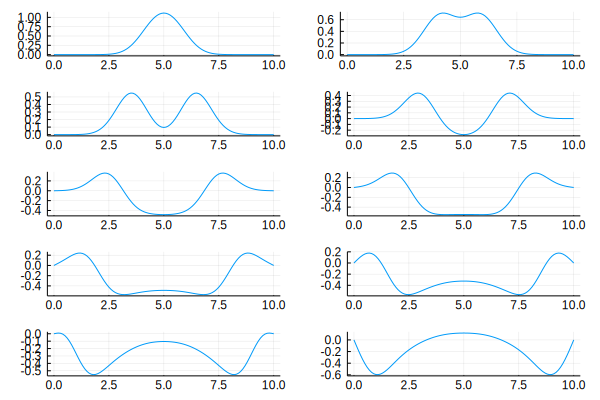

In [235]:
plot(p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],layout=(5,2),legend=false)

## Convergence

In [241]:
xstart = 0
xend = 10

N = 100
delta_x = (xend-xstart)/N

lambda = 0.1

delta_t1 = lambda*delta_x
delta_t2 = delta_t1/2
delta_t3 = delta_t2/2

T = 500

beta = 1.0;

In [242]:
phi0 = zeros(N+1,3)
f0 = zeros(N+1,3)
g0 = zeros(N+1,3)

for i in 1:N+1
            
    phi0[i,1],g0[i,1],f0[i,1] = init(delta_x*(i-1))
    phi0[i,2],g0[i,2],f0[i,2] = init(delta_x*(i-1))
    phi0[i,3],g0[i,3],f0[i,3] = init(delta_x*(i-1))
            
end

x = zeros(N+1,1)
for i in 1:N+1
    x[i] = delta_x*(i-1)
end

In [243]:
j = 0
p = Array{Any,2}(undef,10,2)

for i in 1:T

    phiN1,fN1,gN1 = update(phi0[:,1],f0[:,1],g0[:,1],delta_t1,delta_x,beta)

    for j in 1:N+1
        phi0[j,1] = phiN1[j]
        f0[j,1] = fN1[j]
        g0[j,1] = gN1[j]
    end
        
end

for i in 1:2*T

    phiN2,fN2,gN2 = update(phi0[:,2],f0[:,2],g0[:,2],delta_t2,delta_x,beta)

    for j in 1:N+1
        phi0[j,2] = phiN2[j]
        f0[j,2] = fN2[j]
        g0[j,2] = gN2[j]
    end
        
end

for i in 1:4*T

    phiN3,fN3,gN3 = update(phi0[:,3],f0[:,3],g0[:,3],delta_t3,delta_x,beta)

    for j in 1:N+1
        phi0[j,3] = phiN3[j]
        f0[j,3] = fN3[j]
        g0[j,3] = gN3[j]
    end
        
end

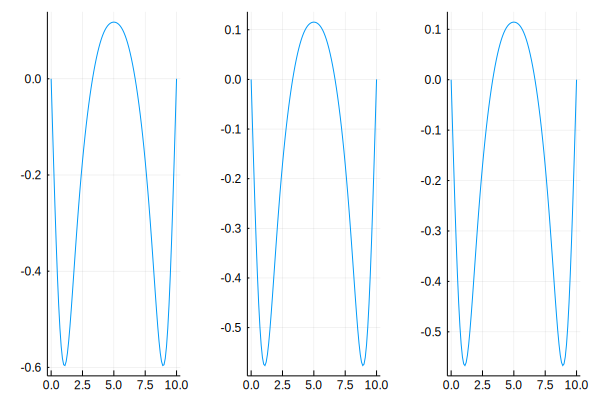

In [244]:
p1 = plot(x,phi0[:,1])
p2 = plot(x,phi0[:,2])
p3 = plot(x,phi0[:,3])
plot(p1,p2,p3,layout=(1,3),legend=false)

In [245]:
L1 = sqrt((sum(phi0[:,1]-phi0[:,2]))^2/N)
L2 = sqrt((sum(phi0[:,2]-phi0[:,3]))^2/N)

L1/L2

2.0448527166520787

In [257]:
function convergence(udate,lambda)
    
    xstart = 0
    xend = 10

    N = 100
    delta_x = (xend-xstart)/N

    delta_t1 = lambda*delta_x
    delta_t2 = delta_t1/2
    delta_t3 = delta_t2/2

    T = 1000

    beta = 1.0;
   
    phi0 = zeros(N+1,3)
    f0 = zeros(N+1,3)
    g0 = zeros(N+1,3)

    for i in 1:N+1
            
        phi0[i,1],g0[i,1],f0[i,1] = init(delta_x*(i-1))
        phi0[i,2],g0[i,2],f0[i,2] = init(delta_x*(i-1))
        phi0[i,3],g0[i,3],f0[i,3] = init(delta_x*(i-1))
    
    end

    for i in 1:T

        phiN1,fN1,gN1 = udate(phi0[1:N+1,1],f0[1:N+1,1],g0[1:N+1,1],delta_t1,delta_x,beta)

        for j in 1:N+1
            phi0[j,1] = phiN1[j]
            f0[j,1] = fN1[j]
            g0[j,1] = gN1[j]
        end
        
    end

    for i in 1:2*T

        phiN2,fN2,gN2 = udate(phi0[1:N+1,2],f0[1:N+1,2],g0[1:N+1,2],delta_t2,delta_x,beta)

        for j in 1:N+1
            phi0[j,2] = phiN2[j]
            f0[j,2] = fN2[j]
            g0[j,2] = gN2[j]
        end
        
    end

    for i in 1:4*T

        phiN3,fN3,gN3 = udate(phi0[1:N+1,3],f0[1:N+1,3],g0[1:N+1,3],delta_t3,delta_x,beta)

        for j in 1:N+1
            phi0[j,3] = phiN3[j]
            f0[j,3] = fN3[j]
            g0[j,3] = gN3[j]
        end
        
    end

    L1 = sqrt((sum(phi0[:,1]-phi0[:,2]))^2/N)
    L2 = sqrt((sum(phi0[:,2]-phi0[:,3]))^2/N)

    converge = L1/L2
    
    conv = log2(converge)
    
    return conv
    
end
    

convergence (generic function with 1 method)

In [263]:
lambda = zeros(1000,1)
cnvg = zeros(1000,1)

for i in 1:1000
    lambda[i] = 0.005*i
    cnvg[i] = convergence(update,lambda[i])
end

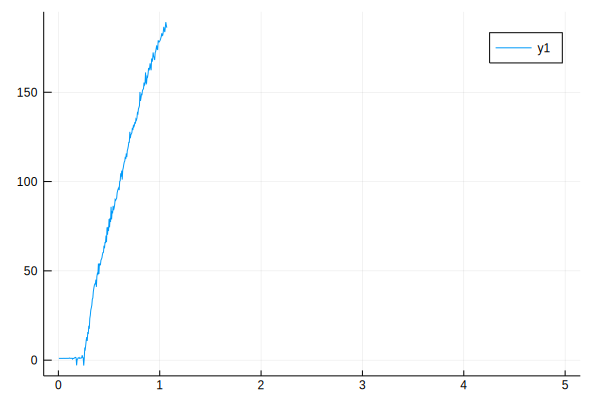

In [264]:
plot(lambda,cnvg)

101

0.01818747818923848

## Runge-Kutta

In [213]:
# Runge-Kutta RK3

function update2(U0::Array{Float64,2},f0::Array{Float64,2},g0::Array{Float64,2},dt::Float64,dx::Float64)
    
    UN = zeros(length(U0),1)
    fN = zeros(length(U0),1)
    gN = zeros(length(U0),1)
    
    UN[1] = 0
    fN[1] = 0
    gN[1] = 0
    
    for i in 2:100
        
        # Centered

        fN[i] = f0[i] + dt*(g0[i+1]-g0[i-1])/(2dx)
        gN[i] = g0[i] + dt*(f0[i+1]-f0[i-1])/(2dx)
        UN[i] = U0[i] + dt*(g0[i+1]-g0[i-1])/(2dx)

    end
    
    UN[101] = 0
    fN[101] = 0
    gN[101] = 0
    
    return UN,fN,gN
    
end

update2 (generic function with 1 method)